TP 2 : Clustering 
====

# 0 - Introduction

L'objectif de ce premier TP est d'étudier quelques techniques de Clustering.
Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [1]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import de fonctions mathématiques
import numpy as np
import scipy as sc

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.cluster
import sklearn.mixture

Afin de vous guider dans la détection d'erreur dans votre code. Nous avons introduit des blocs de tests. Il n'est pas nécessaire que vous compreniez en détail le code de ces blocs. Vous devez uniquement les exécuter et corriger les erreurs de votre code si un des tests n'est pas valide. Il est important de noter que le fait de valider le test ne garantit pas que votre code ne contient pas d'erreur. Par contre un test non validé implique nécessairement que votre code contient une erreur.

- Si tout les tests sont valides, vous aurez un message écrit en vert indiquant : Ok - Tous les tests sont validés.
- Si un des tests n'est pas valide, vous aurez un message écrit en rouge indiquant : Au moins un test n'est pas validé.
- Pour les tests non valides, vous aurez des éléments d'information sur le test non valide. En particulier, un message écrit en jaune vous détaillera la nature du test échoué.

Voici un exemple d'utilisation. Le bloc suivant est censé contenir l'affectation de la valeur 42 à la variable `a`. Le bloc de test d'après vérifie que vous avez correctement effectué l'affectation. Exécutez les deux blocs avec des valeurs de `a` correcte et incorrecte.
Vous devez supprimer la ligne `raise NotImplementedError()` qui indique que vous n'avez pas encore fait l'implémentation.

In [2]:
a = 42
print(a)

42


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(a,42,err_msg="\033[93m {}\033[00m" .format('Test 1 : a n\'est pas égale à 42. Vérifiez que a==42'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


1 - Génération de données
---

Dans cette première partie nous allons générer des données selon 3 Gaussiennes sphériques. Vous utiliserez pour cela la fonction `np.random.normal`. Les caractéristiques des 3 gausiennes sont les suivantes:
- 500 points selon une distribution gaussienne centrée sur le point [0,2], d'écart type 0.1,
- 100 points selon une distribution gaussienne centrée sur le point [-1,0], d'écart type 0.05
- 50  points selon une distribution gaussienne centrée sur le point [1,0], d'écart type 0.05

In [2]:
def gen_3_gausiennes():
    '''
    :return: retourne trois matrices correspondant au trois gausiennes dans l'ordre de la question
    '''
    points = 500
    point = [0,2]
    ecart_type = 0.1
    temp = [[ecart_type, 0], [0, ecart_type]]
    g1 = np.random.multivariate_normal(point, temp, points)

    
    points = 100
    point = [-1, 0]
    ecart_type = 0.05
    temp = [[ecart_type, 0], [0, ecart_type]]
    g2 = np.random.multivariate_normal(point, temp, points)

    points = 50
    point = [1, 0]
    ecart_type = 0.05
    temp = [[ecart_type, 0], [0, ecart_type]]
    g3 = np.random.multivariate_normal(point, temp, points)
    return g1,g2,g3

In [3]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    g1,g2,g3 = gen_3_gausiennes()
    np.testing.assert_equal(g1.shape,(500,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : le nombre de point généré par la première gaussienne est incorrect.'))
    np.testing.assert_equal(g2.shape,(100,2),err_msg="\033[93m {}\033[00m" .format('Test 2 : le nombre de point généré par la deuxième gaussienne est incorrect.'))
    np.testing.assert_equal(g3.shape,(50,2),err_msg="\033[93m {}\033[00m" .format('Test 3 : le nombre de point généré par la troisième gaussienne est incorrect.'))
        
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

del g1,g2,g3

 Ok - Tous les tests sont validés.


Écrivez une fonction qui génére les points selon les trois gausiennes et les concaténe dans une seule matrice. Pour rappel les fonctions de concaténation de `numpy` sont listé à l'adresse : https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays

In [4]:
def gen_pts():
    points = 500
    point = [0,2]
    ecart_type = 0.1
    temp = [[ecart_type, 0], [0, ecart_type]]
    g1 = np.random.multivariate_normal(point, temp, points)

    
    points = 100
    point = [-1, 0]
    ecart_type = 0.05
    temp = [[ecart_type, 0], [0, ecart_type]]
    g2 = np.random.multivariate_normal(point, temp, points)

    points = 50
    point = [1, 0]
    ecart_type = 0.05
    temp = [[ecart_type, 0], [0, ecart_type]]
    g3 = np.random.multivariate_normal(point, temp, points)
    return np.concatenate((g1, g2, g3), axis=0)

X = gen_pts()

In [5]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(gen_pts().shape,(650,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : les dimensions de X ne sont pas correcte.'))
        
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Affichez à l'aide de `matplotlib` les points de la question précédente.

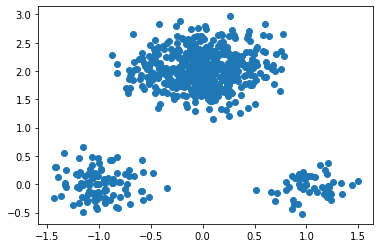

In [10]:
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Créez un vecteur de label (nommé `labels`) contenant le numéro de la gausienne qui a permis de généré chaque point. La première gaussienne a le numéro 0.

In [10]:
g1,g2,g3 = gen_3_gausiennes()

labels = np.concatenate((np.zeros(500), np.ones(100), 2 * np.ones(50)))
X = np.concatenate((g1, g2, g3), axis=0)


In [11]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(labels.shape,(650,),err_msg="\033[93m {}\033[00m" .format('Test 1 : la dimension du vecteur labels n\'est pas correcte.'))
    np.testing.assert_equal(np.all(labels[:500]==0),True,err_msg="\033[93m {}\033[00m" .format('Test 2 : Les labels de la gaussienne 0 sont incorrects'))
    np.testing.assert_equal(np.all(labels[500:600]==1),True,err_msg="\033[93m {}\033[00m" .format('Test 2 : Les labels de la gaussienne 1 sont incorrectes'))
    np.testing.assert_equal(np.all(labels[600:]==2),True,err_msg="\033[93m {}\033[00m" .format('Test 2 : Les labels de la gaussienne 2 sont incorrectes'))
        
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant `X`, `labels` et les paramètres de la fonction `plt.scatter` affichez les points générés avec une couleur différente par gausienne.

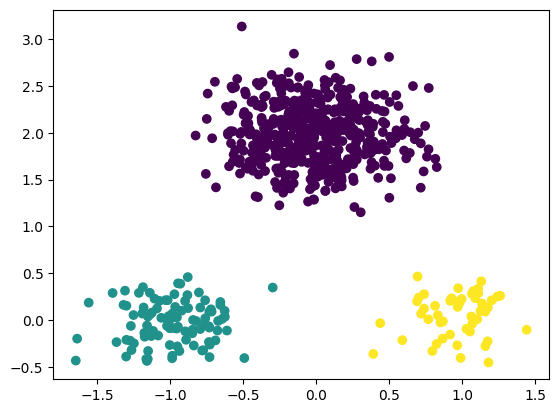

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.show()

2 - Clustering par K-Moyennes
---

Nous allons dans cette partie utiliser l'implémentation de `scikit-learn` de l'algoritheme des K-Moyennes et en étudier les paramètres. 
Commencez par lire la documentation sur le sujet : https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

L'algorithme des K-Moyennes peut être initialisé de plusieurs façon. Faites un apprentissage en partant des trois points suivants : 
- -0.4  ;  2.75
- 0 ;  2.75
- 0.3  ; 2.5

Vous mettrez le paramètre `n_init` à 1.

In [13]:
from sklearn.cluster import KMeans

def get_K_Means_with_spetial_init(X):
    init = np.array([[-0.4, 2.75], [0, 2.75], [0.3, 2.5]])
    kmeans = KMeans(n_clusters=3, init=init, n_init=1)
    kmeans.fit(X)
    return kmeans

In [14]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    _kmeans_ = get_K_Means_with_spetial_init(X)
    
    np.testing.assert_equal(type(_kmeans_),sklearn.cluster._kmeans.KMeans,err_msg="\033[93m {}\033[00m" .format('Test 1 : l\'objet retourné par la fonction get_K_Means_with_spetial_init n\'est pas correct.'))
    try:
        assert 'n_iter_' in _kmeans_.__dict__
    except Exception as e: 
        raise AssertionError("Test 2 : L'algorithme Kmeans n'a pas été appris.")
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

 Ok - Tous les tests sont validés.


Affichez sur une même figure:
- les points dans `X`
- les 3 points de départs
- la position finales des 3 clusters.

Vous utiliserez des couleurs différentes pour différencier ces points.

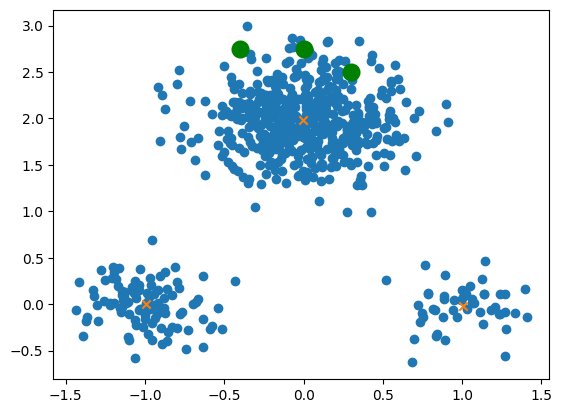

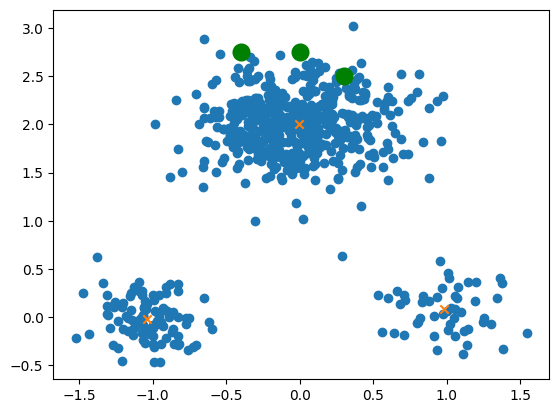

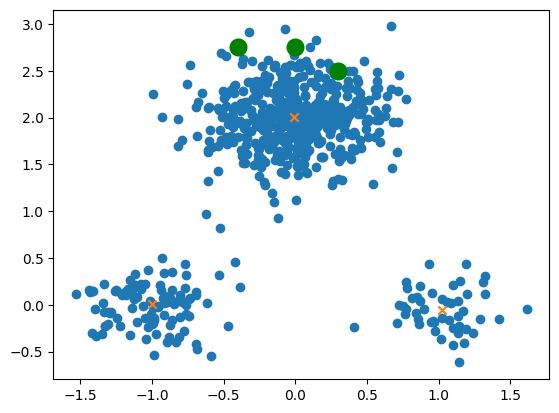

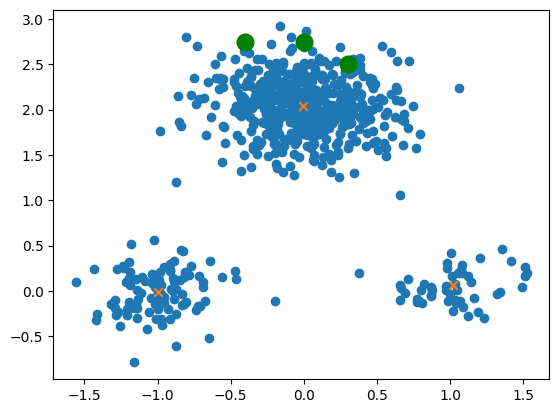

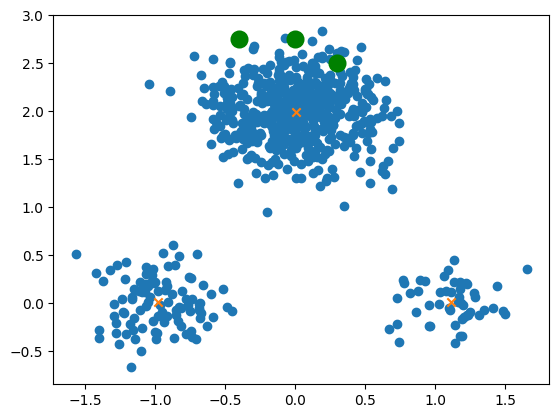

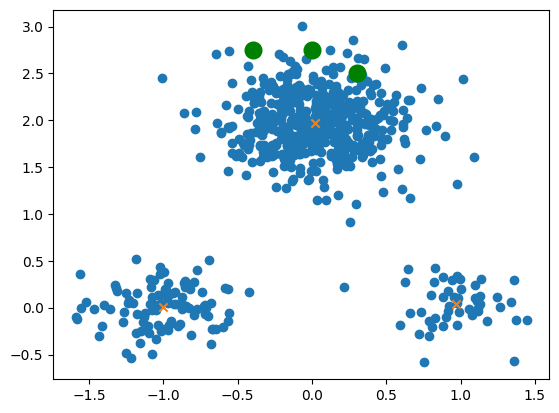

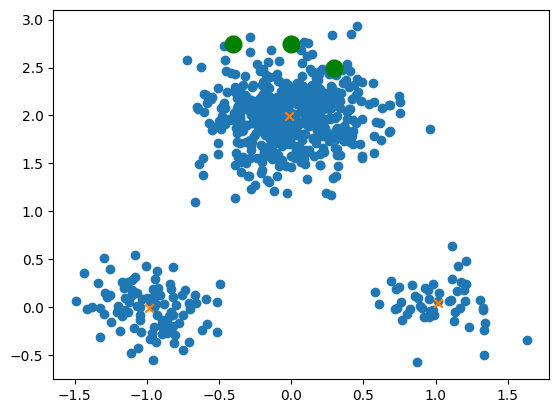

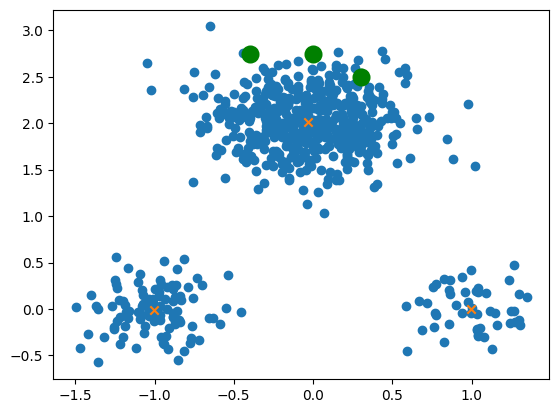

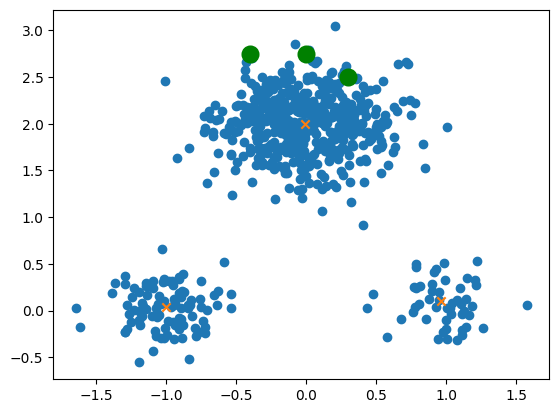

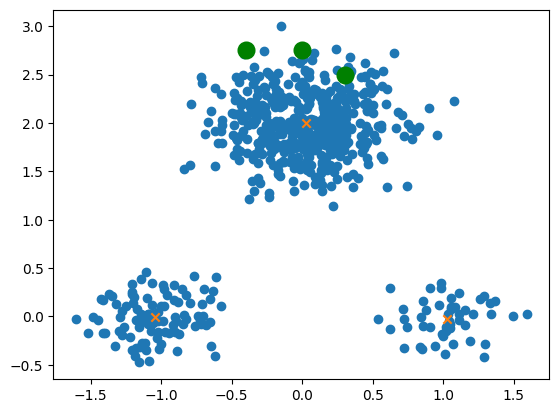

In [15]:
def plot_kmeans_with_spetial_init(X):
    kmeans = get_K_Means_with_spetial_init(X)
    #Points dans X
    plt.scatter(X[:, 0], X[:, 1])

    #Positions des trois cluster par une croix 
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x')

    #3 Points de départs
    plt.scatter([-0.4, 0, 0.3], [2.75, 2.75, 2.5], marker='o', s=100, linewidths=3, color='g')

    plt.show()

# 10 clustering avec 3 nouvelles matrices concantenées
for i in range(10):
    X = gen_pts()
    plot_kmeans_with_spetial_init(X)

Exécutez le code suivant pour visualiser les cellules de Voronoï de chaque cluster.

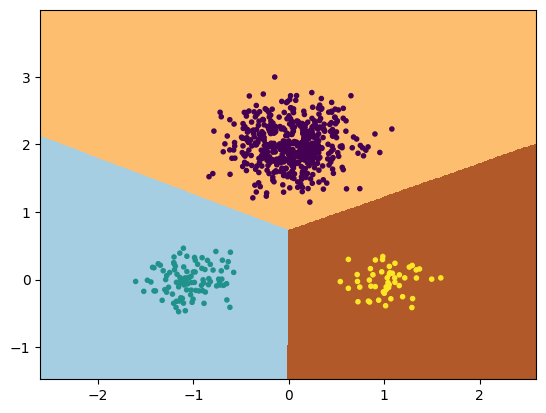

In [16]:
kmeans = get_K_Means_with_spetial_init(X)

def affichage_cellules_Voronoi(clf):
    '''
    Fonction affichant les cellules de Voronoi d'un algorithme de clustering préalablement appris
    :param clf: classifieur non supervisé appris au préalable
    '''
    pas = 500 # pas de quantification, plus la valeur est grande plus les frontières sont précises mais le temps de calcul augmente

    x_min, x_max = X[:, 0].min() -1, X[:, 0].max() +1
    y_min, y_max = X[:, 1].min() -1 , X[:, 1].max() +1
    h = abs(x_max-x_min)/pas 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = clf.predict(np.stack((xx.ravel(), yy.ravel()),1))
    Z = Z.reshape(xx.shape)

    plt.scatter(X[:,0],X[:,1],c=labels,marker='.')
    plt.imshow(Z, interpolation='nearest',
               extent=(xx.min(), xx.max(), yy.min(), yy.max()),
               cmap=plt.cm.Paired,
               aspect='auto', origin='lower')
    plt.show()
    
affichage_cellules_Voronoi(kmeans)

Faites une étude de l'impacte des différentes paramètres possibles de Kmeans. Que font les autres méthodes d'initialisation ? Que se passe-t-il si on fait varier le nombre de classes recherchées ? ...

In [ ]:
#L'initialisation a un impact sur la solution au problème, 
'''
'k-means++' sélectionne les centres initiaux de façon à ce qu'ils soient éloignés les uns des autres.
Si le nombre de classe est trop faible, certaines classes vont fusionner
n_init détermine le nombre de fois que l'algorithme sera exécuté
les paramètres de convergence, tels que la distance de convergence ou le nombre maximum d'itérations influent sur le résultat
'''

"\n'k-means++' sélectionne les centres initiaux de façon à ce qu'ils soient éloignés les uns des autres.\nSi le nombre de classe est trop faible, certaines classes vont fusionner\nn_init détermine le nombre de fois que l'algorithme sera exécuté\nles paramètres de convergence, tels que la distance de convergence ou le nombre maximum d'itérations influent sur le résultat\n"

3 - Modèle de mélange de Gausiennes
-----

Nous allons dans cette partie réalisé un clustering à l'aide d'un mélange de Gausinnes (GMM: Gaussian Mixture Model). Pour cela veuillez étudiez la documentation à la page: https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html

De manière analogue à la partie précédente. Apprenez le mélange de Gaussiennes et affichez les cellules de Voronoï de chaque cluster.

In [26]:
from sklearn.mixture import GaussianMixture

def get_GMM(X):
    '''
    :param X: données d'apprentissage
    :return : un GMM appris avec X
    '''
    gmm = GaussianMixture(n_components=3)
    gmm.fit(X)
    return gmm

In [25]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    _gmm_ = get_GMM(X)
    
    np.testing.assert_equal(type(_gmm_),sklearn.mixture._gaussian_mixture.GaussianMixture,err_msg="\033[93m {}\033[00m" .format('Test 1 : l\'objet retourné par la fonction get_GMM n\'est pas correct.'))
    try:
        assert 'n_iter_' in _gmm_.__dict__
    except Exception as e: 
        raise AssertionError("Test 2 : L'algorithme GMM n'a pas été appris.")
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

 Ok - Tous les tests sont validés.


Les données que nous utilisons jusqu'à présent sont définis selon des clusters sphériques. Nous allons maintenant utiliser des données réparties selon des ellipses. Pour cela utilisez la fonction `np.random.multivariate_normal` ( https://numpy.org/doc/stable/reference/random/generated/numpy.random.multivariate_normal.html ).

Les caractéristiques des 3 lois normales sont les suivantes:
- 500 points selon une distribution normal centrée sur le point [4,6], de covariance $\left[\begin{array}{cc}
1&0.7\\
0.7&1
\end{array}
\right]
$,
- 100 points selon une distribution normal centrée sur le point [0,0], de covariance $\left[\begin{array}{cc}
0.7&-0.5\\
-0.5&0.7
\end{array}
\right]
$,
- 50  points selon une distribution normal centrée sur le point [7,2], de covariance $\left[\begin{array}{cc}
0.3&0\\
0&0.3
\end{array}
\right]
$.

In [28]:
def gen_pts_3cluster_ellipse():
    '''
    :return : des points générer selon trois distributions normales elliptiques pré-définis.
    '''
    mean1 = [4, 6]
    cov1 = [[1, 0.7], [0.7, 1]]
    X1 = np.random.multivariate_normal(mean1, cov1, 500)
    mean2 = [0, 0]
    cov2 = [[0.7, -0.5], [-0.5, 0.7]]
    X2 = np.random.multivariate_normal(mean2, cov2, 100)
    mean3 = [7, 2]
    cov3 = [[0.3, 0], [0, 0.3]]
    X3 = np.random.multivariate_normal(mean3, cov3, 50)
    X = np.concatenate((X1, X2, X3))
    return X

X_ellipse = gen_pts_3cluster_ellipse()


In [29]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    X_ellipse = gen_pts_3cluster_ellipse()
    np.testing.assert_equal(X_ellipse.shape,(650,2),err_msg="\033[93m {}\033[00m" .format('Test 1 : le nombre de points générés est incorrect.'))
        
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

 Ok - Tous les tests sont validés.


Visualisez les points générés

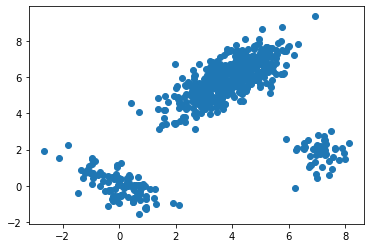

In [30]:
import matplotlib.pyplot as plt

def plot_points(X):
    plt.scatter(X[:, 0], X[:, 1])
    plt.show()

X_ellipse = gen_pts_3cluster_ellipse()
plot_points(X_ellipse)


Comparez l'algorithme des K-moyennes et le GMM sur ces nouvelles données.

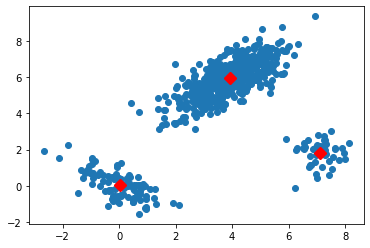

In [31]:
def plot(X):
    kmeans = get_K_Means_with_spetial_init(X)

    # Points dans X
    plt.scatter(X[:, 0], X[:, 1])

    # K-moyennes
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', linewidth= 10, c='red')

    plt.show()

plot(X_ellipse)


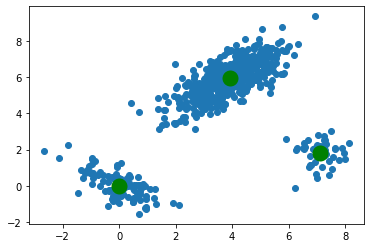

In [32]:
def plot(X):
    gmm = GaussianMixture(n_components=3)
    gmm.fit(X)

    # Points dans X
    plt.scatter(X[:, 0], X[:, 1])

    # GMM
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o', linewidth= 10, c='green')

    plt.show()

plot(X_ellipse)


4 - Clustering Spectral
------

Nous allons dans cette partie réalisé un clustering à l'aide d'un clustering Spectral. Pour cela veuillez étudiez la documentation à la page: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.SpectralClustering.html

Ecrivez un code fessant le clustering spectral de données en utilisant comme `eigen_solver` l'algorithme `arpack` et comme `affinity` un graphe des plus proches voisins. Nous visualiserons le résultat dans la question suivante.

In [33]:
from sklearn.cluster import SpectralClustering

def get_spectral_clustering(X):
    spectre = SpectralClustering(n_clusters=3, eigen_solver='arpack', affinity='nearest_neighbors')
    spectre.fit(X)
    return spectre

In [34]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    X_ellipse = gen_pts_3cluster_ellipse()
    _spectral_ = get_spectral_clustering(X_ellipse)
    
    np.testing.assert_equal(type(_spectral_),sklearn.cluster._spectral.SpectralClustering,err_msg="\033[93m {}\033[00m" .format('Test 1 : l\'objet retourné par la fonction get_GMM n\'est pas correct.'))
    try:
        assert 'labels_' in _spectral_.__dict__ 
    except Exception as e: 
        raise AssertionError("\033[93m {}\033[00m" .format("Test 2 : L'algorithme spectral n'a pas été appris."))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


 Ok - Tous les tests sont validés.


Affichez les points avec une couleur différent en fonction du label prédit par l'algorithme spectral. Les labels prédis sont stocké dans l'attribut `labels_`.

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


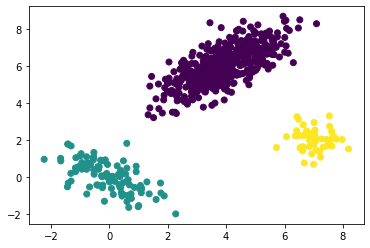

In [40]:
def plot_spectral_clustering(X, spectre):
    plt.scatter(X[:, 0], X[:, 1], c=spectre.labels_)
    plt.show()

spectre = get_spectral_clustering(X_ellipse)
plot_spectral_clustering(X_ellipse, spectre)

Nous allons maintenant générer un nouveau ensemble de données en utilisant le code ci-dessous.

In [36]:
def gen_2_moons():
    n_samples = 1500
    noisy_moons = data.make_moons(n_samples=n_samples, noise=.05)
    X = skl.preprocessing.StandardScaler().fit_transform(noisy_moons[0])
    labels = noisy_moons[1]
    
    return X,labels

X_moons,labels_moons = gen_2_moons()

Affichez les nouvelles données

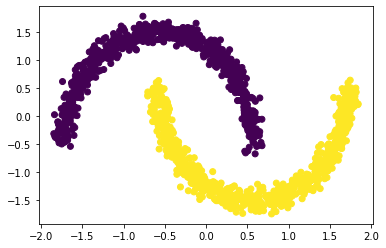

In [37]:
def plot_2_moons(X, labels):
    plt.scatter(X[:,0], X[:,1], c=labels, cmap='viridis')
    plt.show()

plot_2_moons(X_moons, labels_moons)

Appliquez les différentes méthodes de clustering vu dans ce TP aux données de `X_moons`.

**K-Moyennes**

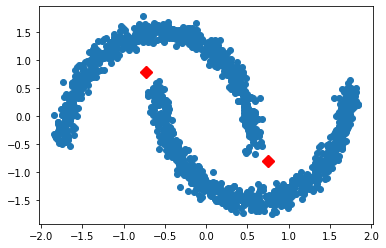

In [38]:
def get_K_Means_with_spetial_init(X, n):
    init = np.array([[-0.4, 2.75], [0, 2.75]])
    kmeans = KMeans(n_clusters=n, init=init, n_init=1)
    kmeans.fit(X)
    return kmeans

def plot(X):
    kmeans = get_K_Means_with_spetial_init(X, 2)

    # Points dans X
    plt.scatter(X[:, 0], X[:, 1])

    # K-moyennes
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='x', linewidth= 10, c='red')

    plt.show()

plot(X_moons)


**Mélange de Gausiennes**

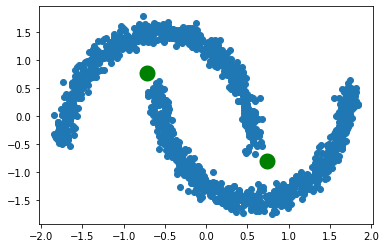

In [39]:
def plot(X):
    gmm = GaussianMixture(n_components=2)
    gmm.fit(X)

    # Points dans X
    plt.scatter(X[:, 0], X[:, 1])

    # GMM
    plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], marker='o', linewidth= 10, c='green')

    plt.show()

plot(X_moons)


5 - Programmation de l'algorithme des K-Moyennes
-----

L'objectif de cette question est de recoder une fonction analogue à celle que vous avez utiliser avec `scikit-learn`. Vous n'êtes donc pas autorisé à utiliser la librairie `scikit-learn` dans cette partie. Votre solution ne doit utiliser que les libraires `numpy` et `scipy`.

Écrivez une fonction *initCentre* qui prend le nombre de centre en paramètre, le nombre de dimension des centres (2 dans les exemples précédent) et retourne des centres tirés selon une loi uniforme entre 0 et 1. Cela correspondra à l’initialisation de l’algorithme.

In [41]:
def initCentre(n,d=2):
    '''
    :param n: nombre de centre
    :param d: dimension de chaque centre
    :return : Retourne n centre de dimension d initialisé aléatoirement selon une loi uniforme
    '''
    return np.random.uniform(0,1,(n,d))

In [42]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    centre = initCentre(10,5)
    np.testing.assert_equal(centre.shape,(10,5),err_msg="\033[93m {}\033[00m" .format('Test 1 : Les dimensions des centres généres sont incorrect.'))
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Faites une fonction `association` qui prend en argument des points et des centres et qui retourne l’association entre chaque point et le numéro du centre le plus proche. Pour réaliser cette fonction, vous pouez utiliser la fonction `cdist` de `scipy` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html) . 

In [43]:
from scipy.spatial.distance import cdist

def association(p,c):
    '''
    :param p: des points
    :param c: des centres
    :return: l'association de chaque point au centre le plus proch.
    '''
    distances = cdist(p, c, metric='euclidean')
    closest_center = np.argmin(distances, axis=1)
    return closest_center

In [44]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    _centre_ = initCentre(10,5)
    _p_ = np.random.randn(100,5)
    _asso_ = association(_p_,_centre_) 
    np.testing.assert_equal(_asso_.shape,(100,),err_msg="\033[93m {}\033[00m" .format('Test 1 : Il doit y avoir une seule association pour chaque point.'))
    np.testing.assert_equal(_asso_.dtype,np.int,err_msg="\033[93m {}\033[00m" .format('Test 2 : Les associations doivent être des entiers.'))
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

 Ok - Tous les tests sont validés.


<ipython-input-44-857b8f21ce02>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.testing.assert_equal(_asso_.dtype,np.int,err_msg="\033 {}\033" .format('Test 2 : Les associations doivent être des entiers.'))


Faites une fonction `updateCentres` qui prend des points, leurs associations à des centres, le nombre de centre et qui retourne la position des nouveauy centres en fonction des associations.
Pour chaque centre vous calculerez le centre moyen des points qui lui ont été associé.  Si aucun point n’a été assigné à ce centre, vous en tirez un nouveau aléatoirement entre 0 et 1. 

Même si cela est faisable sans, vous pouvez utiliser une boucle for et un seul if pour cette question. 

In [45]:
def updateCentres(p,a,nbCenter):
    '''
    :param p: des points
    :param a: associations de chaque point à un centre
    :param nbCenter: nombre de centres
    :return: la position des nouveaux centres en fonction des associations
    '''
    n, d = p.shape
    centers = np.zeros((nbCenter, d))
    for i in range(nbCenter):
      points_assigned_to_center = p[a == i]
      if points_assigned_to_center.shape[0] == 0:
          centers[i] = np.random.uniform(0, 1, d)
      else:
          centers[i] = np.mean(points_assigned_to_center, axis=0)

    return centers

In [ ]:
#BONUS: solution sans for et sans if
# YOUR CODE HERE
raise NotImplementedError()

In [46]:

# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    _centre_ = initCentre(10,5)
    _centre_[4,:] = _centre_[1,:]
    _p_ = np.random.randn(100,5)
    _asso_ = association(_p_,_centre_) 
    new_c = updateCentres(_p_,_asso_,10) 
    np.testing.assert_equal(new_c.shape[0],10,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le nombre de centres générés n\'est pas correct'))
    np.testing.assert_equal(new_c.shape[1],5,err_msg="\033[93m {}\033[00m" .format('Test 2 : La dimension des centres générés n\'est pas correct'))
    np.testing.assert_equal(1e-3 < np.sum((new_c[1,:]-new_c[4,:])**2),True,err_msg="\033[93m {}\033[00m" .format('Test 3 : Il est possible que la gestion des centres ayant aucun point soit incorrect.'))    
    
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    



 Ok - Tous les tests sont validés.


Créez une fonction *kmeans* implémentant l’algorithme de K-moyennes. Cette fonction prendra comme argument les points d’apprentissage, le nombre de cluster recherché et le nombre d’itération de l’algorithme. Elle retournera les centres trouvés. Vous utiliserez une boucle for pour chaque itération ainsi que les fonctions : *initCentre*, *association* et *updateCentres*.

In [48]:
def kmeans(x,nbCenter,nIteration):
    n, d = x.shape
    centers = initCentre(nbCenter, d)
    for _ in range(nIteration):
      associations = association(x, centers)
      centers = updateCentres(x, associations, nbCenter)
    return centers